In [ ]:
#load data txt fra raketbane via Tracker.
 
#Husk at have kaliberet datapunkterne i raket.py

#Import pakker, hvis de ikke er installeret, så brug pip install pakke overfor.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from scipy.ndimage import gaussian_filter

#Skriv sti til datafilen
path="C:/Users/chrel/Downloads/raket_forsøg/masse_slow.txt"
data = pd.read_csv(path, delimiter='\t')
#print names of columns
print(data.columns)  # Display the names of the columns
data = data.to_numpy()  # Convert DataFrame to NumPy array

Index(['t', 'y', 'x'], dtype='object')


In [ ]:
#Fit dataen til kasteparabel
x = data[:,2]+2.72104567985319  #Sørg for at rette for offset i x og y
y = data[:,1]+0.649904926577511 
t= data[:,0]*1/8 # ret fra slowmotion  

A=np.array([np.ones(len(x)),x,x**2]).T #Denne er for en kasteparabel
AT=A.T

# Løs for koefficienter c 
c = np.linalg.solve(np.dot(AT,A),np.dot(AT,y))

print(c)  # koefficients of the polynomial

[ 0.11414516  0.89505494 -0.00739083]


In [71]:
#Find information af konstanterne ved at løse for a, b, c


# a=-g/(2*v_0**2*cos(theta)**2)
# b=tan(theta)
# c=y_0
# Beregn v_0 og theta

g = 9.81  # Acceleration due to gravity in m/s^2
theta = np.arctan(c[1])*180/np.pi  # Convert radians to degrees 
v_0 = np.sqrt(-g/(2*c[2]*np.cos(theta)**2))  
h= c[0]  # c[0] corresponds to the initial height y_0
# Print the results
print(f"Initial velocity (v_0): {v_0:.2f} m/s")
print(f"Launch angle (theta): {theta:.2f} degrees")
print(f"Initial height (h): {h:.2f} m")

# Find the velocity linearly by data
print(f"velocity by data: {np.sqrt((x[20]-x[0])**2+(y[20]-y[0])**2)/(t[20]-t[0]):.2f}")

Initial velocity (v_0): 46.92 m/s
Launch angle (theta): 41.83 degrees
Initial height (h): 0.11 m
velocity by data: 21.99


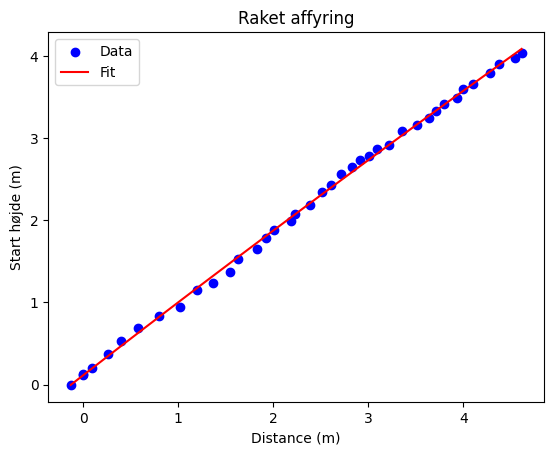

In [72]:
#Plot måledata og fit
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, c[0] + c[1]*x + c[2]*x**2, label='Fit', color='red')
plt.xlabel('Distance (m)')
plt.ylabel('Start højde (m)')
plt.title('Raket affyring')
plt.legend()
plt.show()

Hvordan afviger kasteparablen fra den rigtige bane (dataen)?

Prøv med hjælp af de fundne start værdier at simulere luftmodstanden.

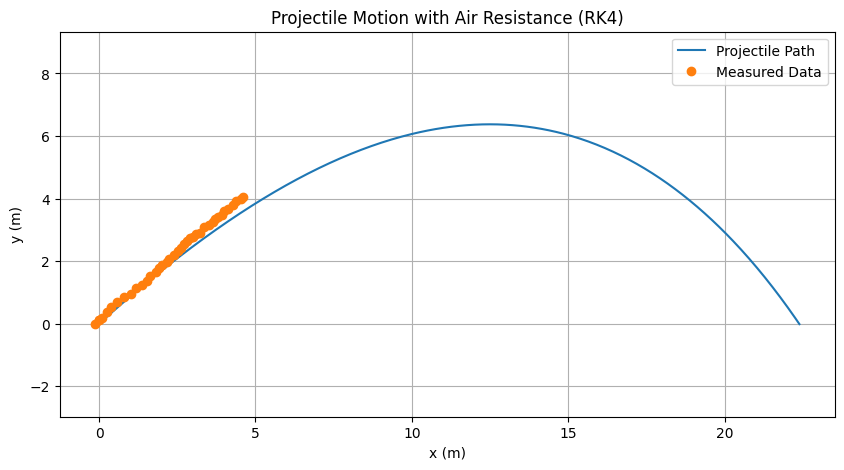

In [ ]:
# Constants
g = 9.81              # gravity (m/s^2)
dt = 0.005             # time step (s)
T_max = 10            # maximum time (s)
x0, y0 = 0, 0         # initial position
# Derivatives for RK4
def derivatives(state, k, m):
    x, y, vx, vy = state
    v = np.hypot(vx, vy)
    ax = -k * v * vx / m
    ay = -g - (k * v * vy / m)
    return np.array([vx, vy, ax, ay])

# Runge-Kutta 4th order integrator
def rk4_step(state, dt, k, m):
    k1 = derivatives(state, k, m)
    k2 = derivatives(state + 0.5 * dt * k1, k, m)
    k3 = derivatives(state + 0.5 * dt * k2, k, m)
    k4 = derivatives(state + dt * k3, k, m)
    return state + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)

# Simulation loop
def throw(v0, theta_deg, k, m):
    theta_rad = np.radians(theta_deg)
    vx0 = v0 * np.cos(theta_rad)
    vy0 = v0 * np.sin(theta_rad)
    state = np.array([x0, y0, vx0, vy0])
    trajectory = [state.copy()]
    t = 0

    while state[1] >= 0 and t <= T_max:
        state = rk4_step(state, dt, k, m)
        trajectory.append(state.copy())
        t += dt

    # Convert to arrays for plotting
    trajectory = np.array(trajectory)
    x_vals, y_vals = trajectory[:, 0], trajectory[:, 1]
    return x_vals, y_vals

#Chosse values for v0, theta_deg, k, m
v0=20
theta_deg=41.83 
A=0.001 # # Cross-sectional area (m^2)
Cd=0.5  # Drag coefficient
p_luft=1.2  # Density of air (kg/m^3)
k=1/2*A*Cd*p_luft  
m=0.01 #mass [kg]

x_vals, y_vals = throw(v0, theta_deg ,k , m)
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, label='Projectile Path')
plt.plot(x,y, label='Measured Data', marker='o', linestyle='None')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Projectile Motion with Air Resistance (RK4)')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()

In [74]:
# Energy calculation
E= 0.5 * m * v0**2  # Initial kinetic energy

#Energy from adiabatic expansion, find formula in the material


#Find the ratio (effeciency) of pressure energy to kinetic energy.

